# Bike Sharing Demand
## Final Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
hour = pd.read_csv('hour.csv')
day = pd.read_csv('day.csv')

In [3]:
# Coerce the datatype of “season”,”holiday”,”workingday” and weather to categorical datatype

In [4]:
hour=hour.astype({'season':'category'})

In [5]:
hour= hour.astype({'holiday':'category'})

In [6]:
hour= hour.astype({'workingday':'category'})

In [7]:
hour= hour.astype({'weathersit':'category'})

In [8]:
hour.dtypes

instant          int64
dteday          object
season        category
yr               int64
mnth             int64
hr               int64
holiday       category
weekday          int64
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [9]:
hour_year_1 = hour[hour.yr == 0].reset_index(drop=True)
hour_year_2 = hour[hour.yr == 1].reset_index(drop=True)

In [10]:
# Outlier Analysis

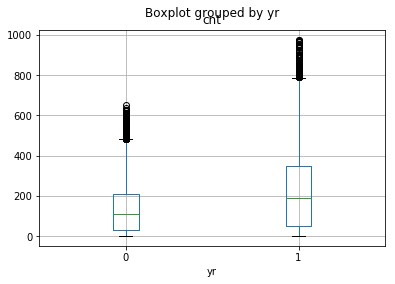

In [11]:
hour_of_day_cnt=hour.boxplot(column='cnt', by='yr')

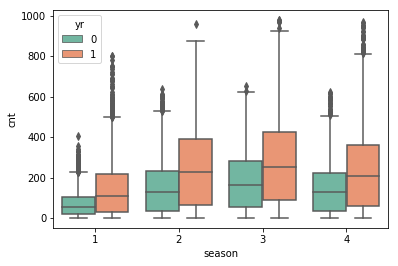

In [12]:
by_season=sns.boxplot(x = 'season',y='cnt',data =hour,hue="yr", palette="Set2")

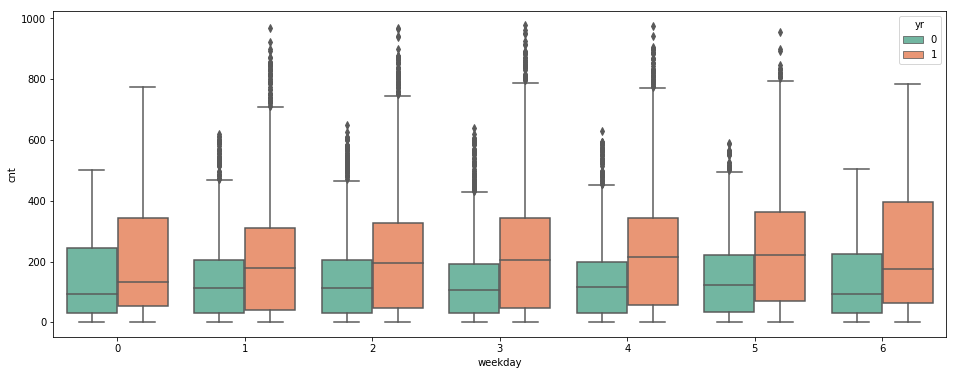

In [13]:
plt.figure(figsize=(16, 6))
by_day=sns.boxplot(x = 'weekday',y='cnt',data =hour,hue="yr", palette="Set2")

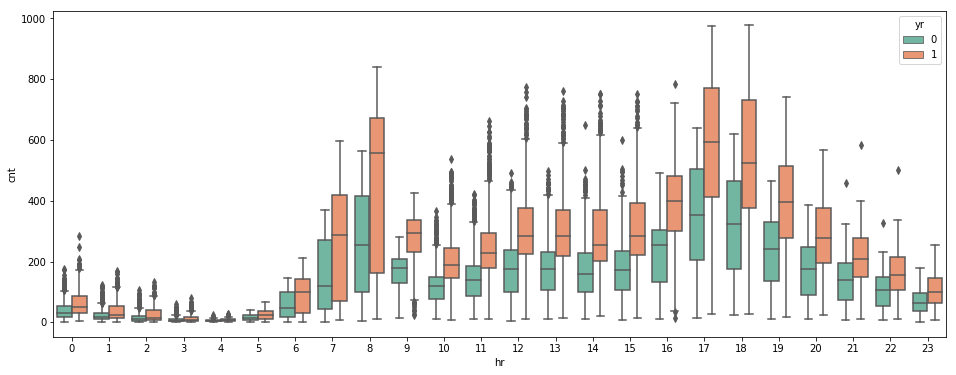

In [14]:
plt.figure(figsize=(16, 6))
by_hour=sns.boxplot(x = 'hr',y='cnt',data =hour,hue="yr", palette="Set2")

In [15]:
hour_year_1.cnt.median()

109.0

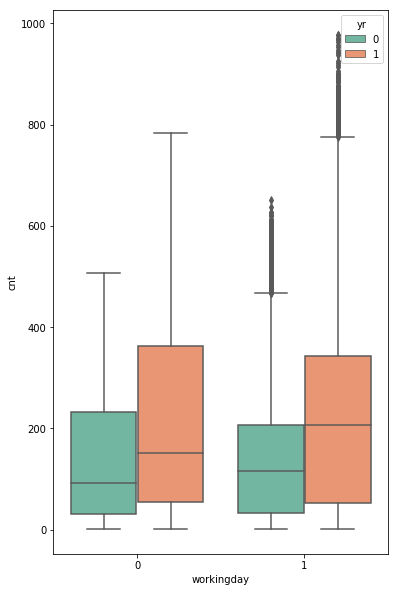

In [16]:
plt.figure(figsize=(6, 10))
by_hour=sns.boxplot(x = 'workingday',y='cnt',data =hour,hue="yr", palette="Set2")

In [17]:
# Spring season has got relatively lower count. The dip in median value in box plot gives evidence for it.
# The median value at 8a.m. and 5-6 p.m. are much higher due to regular school and office users
# All of the outlier points are contributed by the working days

In [18]:
#--------------------------------------------------------------------------------------------------------

In [19]:
# Correlation Analysis

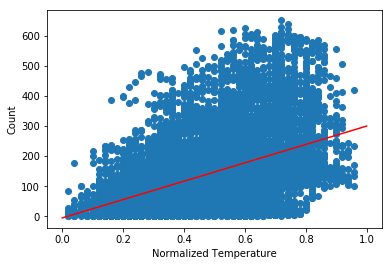

In [20]:
_=plt.scatter('temp','cnt',data=hour_year_1)
a, b = np.polyfit(hour_year_1.temp,hour_year_1.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Temperature')
_ = plt.ylabel('Count')
plt.show()

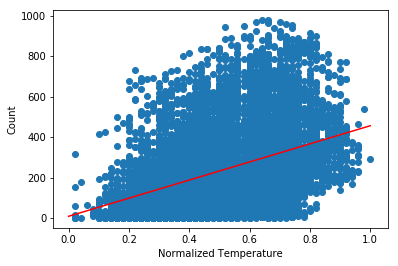

In [21]:
_=plt.scatter('temp','cnt',data=hour_year_2)
a, b = np.polyfit(hour_year_2.temp,hour_year_2.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Temperature')
_ = plt.ylabel('Count')
plt.show()

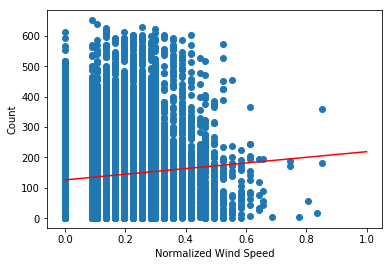

In [22]:
plt.scatter('windspeed','cnt',data=hour_year_1)
a, b = np.polyfit(hour_year_1.windspeed,hour_year_1.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
plt.show()

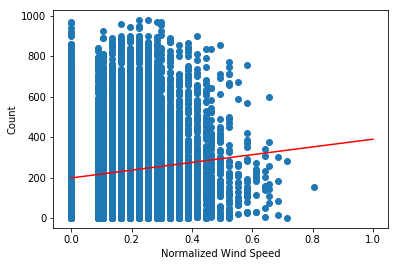

In [23]:
plt.scatter('windspeed','cnt',data=hour_year_2)
a, b = np.polyfit(hour_year_2.windspeed,hour_year_2.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
plt.show()

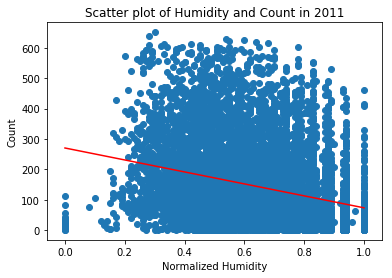

In [24]:
plt.scatter('hum','cnt',data=hour_year_1)
a, b = np.polyfit(hour_year_1.hum,hour_year_1.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Humidity')
_ = plt.ylabel('Count')
_ = plt.title('Scatter plot of Humidity and Count in 2011')
plt.show()

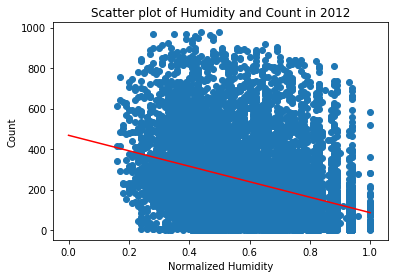

In [25]:
plt.scatter('hum','cnt',data=hour_year_2)
a, b = np.polyfit(hour_year_2.hum,hour_year_2.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Humidity')
_ = plt.ylabel('Count')
_ = plt.title('Scatter plot of Humidity and Count in 2012')

plt.show()

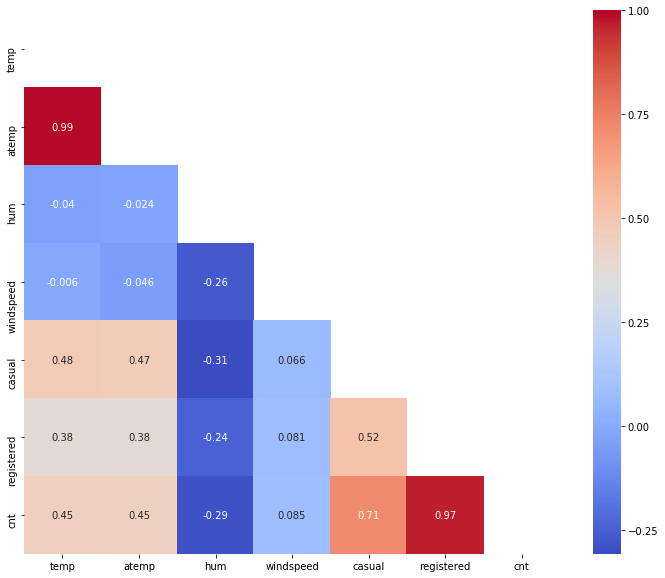

In [26]:
corr = hour_year_1.drop(['instant','yr','mnth','hr','weekday'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);



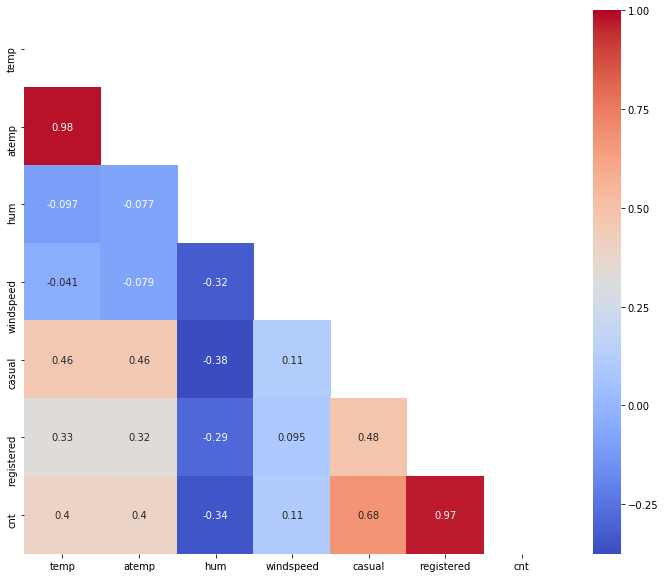

In [27]:
corr = hour_year_2.drop(['instant','yr','mnth','hr','weekday'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);


In [28]:
# “temp” and “humidity” features have positive and negative correlation with count respectively. 
# Although the correlations between them are not very prominent, 
# still the count variable has got little dependency on “temp” and “humidity”.
# “windspeed” is not going to be a really useful numerical feature 
# and that is visible from the correlation value with “count”, 0.085 and 0.11 for year of 2011 and 2012 respectively.
# “atemp” variable is not taken into account since “atemp” and “temp” has strong correlation with each other. 
# During model building any one of the variables has to be dropped since they will exhibit multicollinearity in the data.
# “casual” and “registered” attributes are also not taken into account 
# since they are leakage variables in nature and need to be dropped during model building.

In [29]:
#--------------------------------------------------------------------------------------------------------

In [30]:
# Visualizing Distribution Of Independent Variable

In [31]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histgram of Count in Year 2011')

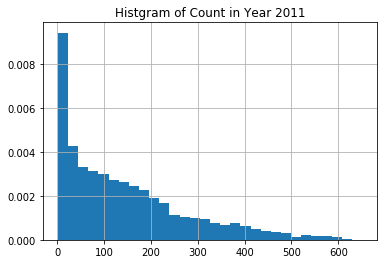

In [32]:
hour_year_1.cnt.hist(bins = 30,normed = True)
plt.title('Histgram of Count in Year 2011')

Text(0, 0.5, 'ECDF')

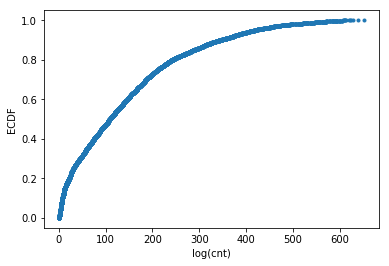

In [33]:
x1,y1 = ecdf(hour_year_1.cnt)
plt.plot(x1,y1,marker='.',linestyle='none')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

In [34]:
#Remove Outlier
IQR1 = hour_year_1.cnt.quantile(q=0.75, interpolation='linear')-hour_year_1.cnt.quantile(q=0.25, interpolation='linear')
lower_outlier_1 =  hour_year_1.cnt.quantile(q=0.25, interpolation='linear') - 1.5* IQR1
higher_outlier_1 =  hour_year_1.cnt.quantile(q=0.75, interpolation='linear') + 1.5* IQR1
new_hour_year1=hour_year_1[hour_year_1.cnt>lower_outlier_1]
new_hour_year_1 = new_hour_year1[hour_year_1.cnt<higher_outlier_1]


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histgram of Count in Year 2011 after remove Outlier and Applied natural logarithm')

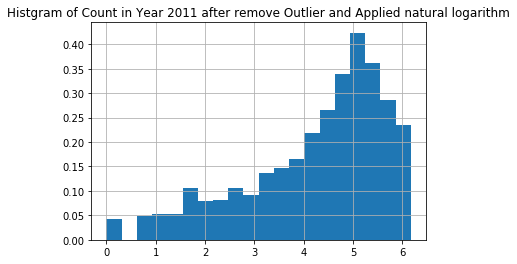

In [35]:
log_year_1=np.log(new_hour_year_1.cnt).hist(bins=20,normed= True)
plt.title('Histgram of Count in Year 2011 after remove Outlier and Applied natural logarithm')

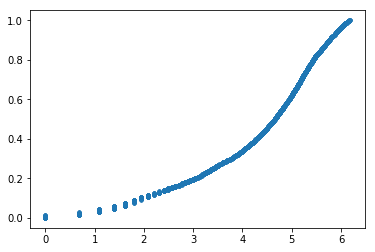

In [36]:
x11,y11 = ecdf(np.log(new_hour_year_1.cnt))
plt.plot(x11,y11,marker='.',linestyle='none')

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'ECDF')

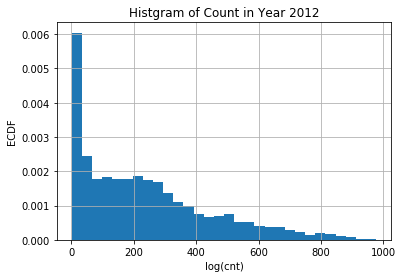

In [37]:
hour_year_2.cnt.hist(bins = 30,normed = True)
plt.title('Histgram of Count in Year 2012')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

Text(0, 0.5, 'ECDF')

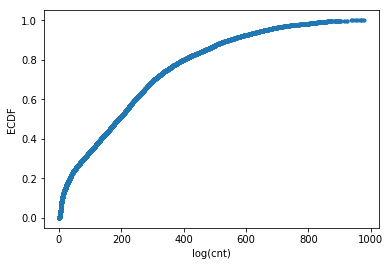

In [38]:
x2,y2 = ecdf(hour_year_2.cnt)
plt.plot(x2,y2,marker='.',linestyle='none')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

In [39]:
#Remove Outlier
IQR2 = hour_year_2.cnt.quantile(q=0.75, interpolation='linear')-hour_year_2.cnt.quantile(q=0.25, interpolation='linear')
lower_outlier_2 =  hour_year_2.cnt.quantile(q=0.25, interpolation='linear') - 1.5* IQR2
higher_outlier_2 =  hour_year_2.cnt.quantile(q=0.75, interpolation='linear') + 1.5* IQR2
new_hour_year2=hour_year_2[hour_year_2.cnt>lower_outlier_2]
new_hour_year_2 = new_hour_year2[hour_year_2.cnt<higher_outlier_2]


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histgram of Count in Year 2012 after remove Outlier and Applied natural logarithm')

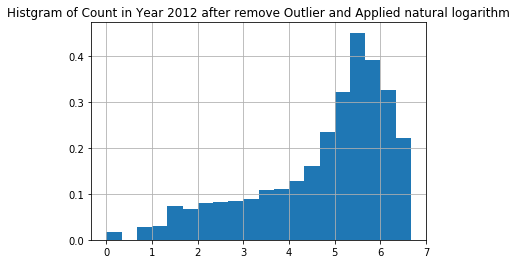

In [40]:
log_year_2=np.log(new_hour_year_2.cnt).hist(bins=20,normed=True)
plt.title('Histgram of Count in Year 2012 after remove Outlier and Applied natural logarithm')

Text(0, 0.5, 'ECDF')

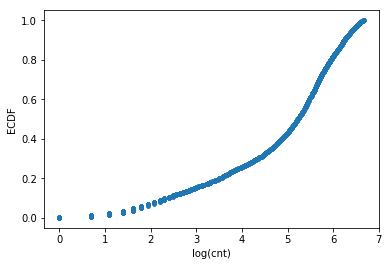

In [41]:
x22,y22 = ecdf(np.log(new_hour_year_2.cnt))
plt.plot(x22,y22,marker='.',linestyle='none')
plt.xlabel('log(cnt)')
plt.ylabel('ECDF')

In [42]:
# Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

In [ ]:
monthly_avg_year1 = []
monthly_avg_year2 = []
for i in range(12):
    monthly_avg_year1.append(np.sum(hour[hour.yr == 0 ] [hour.mnth == (i+1)].cnt)/len(hour[hour.yr == 0 ] [hour.mnth == (i+1)]))
    monthly_avg_year2.append(np.sum(hour[hour.yr == 1 ] [hour.mnth == (i+1)].cnt)/len(hour[hour.yr == 1 ] [hour.mnth == (i+1)]))
 


Text(0.5, 1.0, 'Monthly Average Count in 2011')

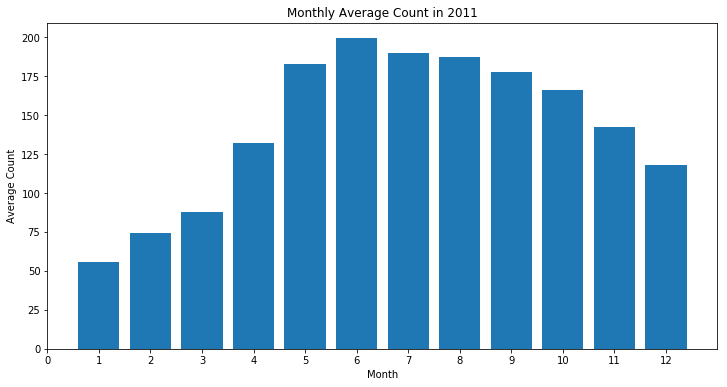

In [59]:
import pandas as pd
monthly_avg_data = pd.DataFrame({'year_2011':monthly_avg_year1,'year_2012':monthly_avg_year2})
plt.figure(figsize=(12,6))
plt.bar(monthly_avg_data.index+1,monthly_avg_data.year_2011)
plt.xticks(np.arange(0, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Monthly Average Count in 2011')

Text(0.5, 1.0, 'Monthly Average Count in 2012')

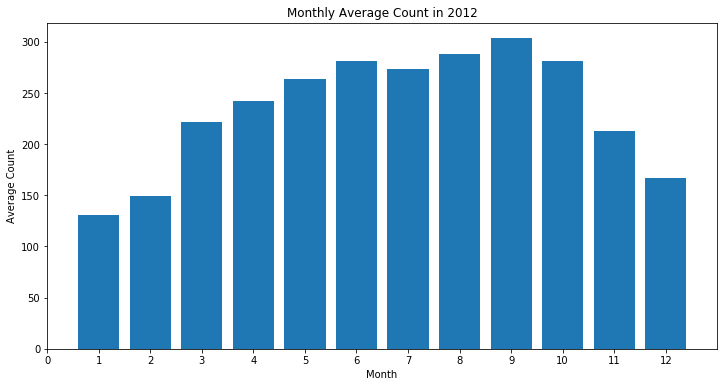

In [60]:
plt.figure(figsize=(12,6))
plt.bar(monthly_avg_data.index+1,monthly_avg_data.year_2012)
plt.xticks(np.arange(0, 13, step=1))
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.title('Monthly Average Count in 2012')

In [ ]:
hourly_avg_year1 = []
hourly_avg_year2 = []
hour_avg=[]
for i in range(4):
    for j in range(24):
        hourly_avg_year1.append(np.sum(hour[hour.yr == 0 ] [hour.season == (i+1)][hour.hr==j].cnt)/len(hour[hour.yr == 0 ] [hour.season == (i+1)][hour.hr==j]))
        hourly_avg_year2.append(np.sum(hour[hour.yr == 1 ] [hour.season == (i+1)][hour.hr==j].cnt)/len(hour[hour.yr == 1 ] [hour.season == (i+1)][hour.hr==j]))
        hour_avg.append(np.sum(hour[hour.season == (i+1)][hour.hr==j].cnt)/len(hour[hour.season == (i+1)][hour.hr==j]))



In [62]:
year1 = pd.DataFrame({'Spring':hourly_avg_year1[0:24],'Summer':hourly_avg_year1[24:48],'Fall':hourly_avg_year1[48:72],'Winter':hourly_avg_year1[72:96]})
year2 = pd.DataFrame({'Spring':hourly_avg_year2[0:24],'Summer':hourly_avg_year2[24:48],'Fall':hourly_avg_year2[48:72],'Winter':hourly_avg_year2[72:96]})                               
overall = pd.DataFrame({'Spring':hour_avg[0:24],'Summer':hour_avg[24:48],'Fall':hour_avg[48:72],'Winter':hour_avg[72:96]})                               


In [63]:
len(hour_avg)

96

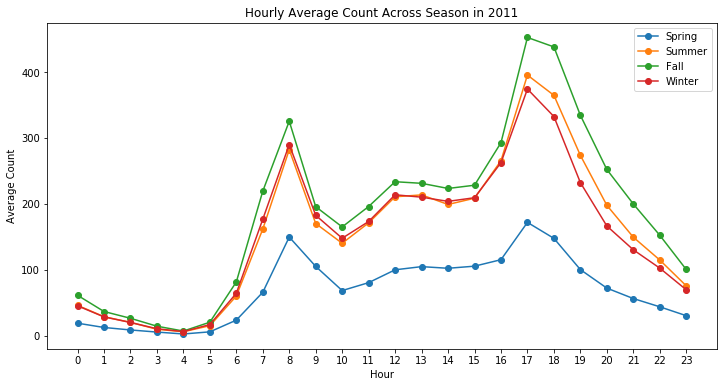

In [64]:
plt.figure(figsize=(12,6))
plt.plot(year1.index,year1.Spring,'-o')
plt.plot(year1.index,year1.Summer,'-o')
plt.plot(year1.index,year1.Fall,'-o')
plt.plot(year1.index,year1.Winter,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Season in 2011')
plt.legend()

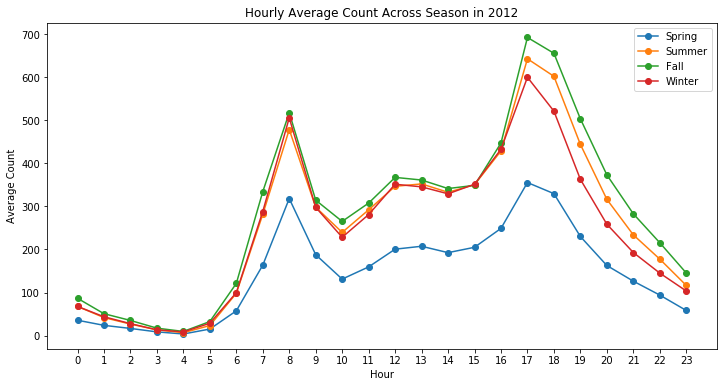

In [65]:
plt.figure(figsize=(12,6))
plt.plot(year1.index,year2.Spring,'-o')
plt.plot(year1.index,year2.Summer,'-o')
plt.plot(year1.index,year2.Fall,'-o')
plt.plot(year1.index,year2.Winter,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Season in 2012')
plt.legend()

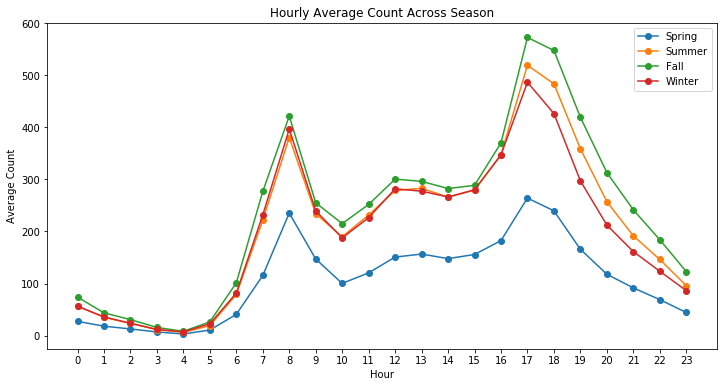

In [66]:
plt.figure(figsize=(12,6))
plt.plot(overall.index,overall.Spring,'-o')
plt.plot(overall.index,overall.Summer,'-o')
plt.plot(overall.index,overall.Fall,'-o')
plt.plot(overall.index,overall.Winter,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Season')
plt.legend()

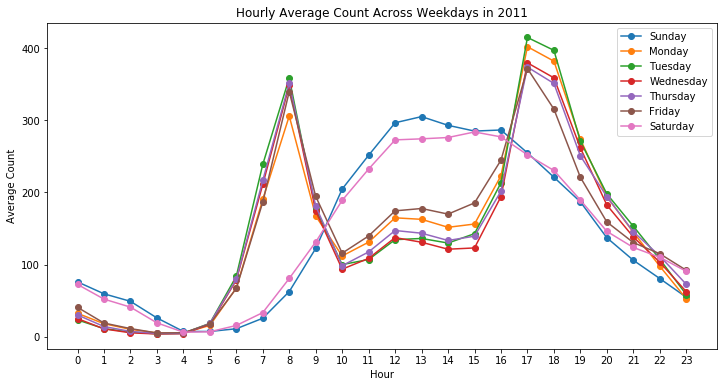

In [69]:
weekday_year1 = pd.DataFrame({'Sunday':hourly_avg_weekday_year1[0:24],'Monday':hourly_avg_weekday_year1[24:48],'Tuesday':hourly_avg_weekday_year1[48:72],'Wednesday':hourly_avg_weekday_year1[72:96],'Thursday':hourly_avg_weekday_year1[96:120],'Friday':hourly_avg_weekday_year1[120:144],'Saturday':hourly_avg_weekday_year1[144:168]})
weekday_year2 = pd.DataFrame({'Sunday':hourly_avg_weekday_year2[0:24],'Monday':hourly_avg_weekday_year2[24:48],'Tuesday':hourly_avg_weekday_year2[48:72],'Wednesday':hourly_avg_weekday_year2[72:96],'Thursday':hourly_avg_weekday_year2[96:120],'Friday':hourly_avg_weekday_year2[120:144],'Saturday':hourly_avg_weekday_year2[144:168]})
weekday = pd.DataFrame({'Sunday':hourly_avg_weekday[0:24],'Monday':hourly_avg_weekday[24:48],'Tuesday':hourly_avg_weekday[48:72],'Wednesday':hourly_avg_weekday[72:96],'Thursday':hourly_avg_weekday[96:120],'Friday':hourly_avg_weekday[120:144],'Saturday':hourly_avg_weekday[144:168]})

plt.figure(figsize=(12,6))
plt.plot(weekday_year1.index,weekday_year1.Sunday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Monday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Tuesday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Wednesday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Thursday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Friday,'-o')
plt.plot(weekday_year1.index,weekday_year1.Saturday,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Weekdays in 2011')
plt.legend()

In [ ]:
hourly_avg_weekday_year1 = []
hourly_avg_weekday_year2 = []
hourly_avg_weekday=[]
for i in range(7):
    for j in range(24):
        hourly_avg_weekday_year1.append(np.sum(hour[hour.yr == 0 ] [hour.weekday == (i)][hour.hr==j].cnt)/len(hour[hour.yr == 0 ] [hour.weekday == (i)][hour.hr==j]))
        hourly_avg_weekday_year2.append(np.sum(hour[hour.yr == 1 ] [hour.weekday == (i)][hour.hr==j].cnt)/len(hour[hour.yr == 1 ] [hour.weekday == (i)][hour.hr==j]))
        hourly_avg_weekday.append(np.sum(hour[hour.weekday == (i)][hour.hr==j].cnt)/len(hour[hour.weekday == (i)][hour.hr==j]))



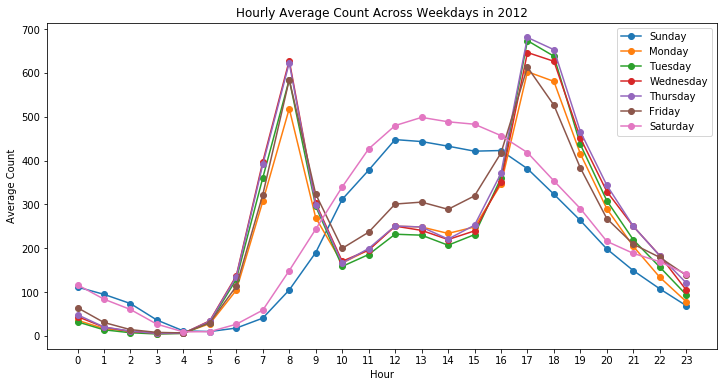

In [70]:
plt.figure(figsize=(12,6))
plt.plot(weekday_year2.index,weekday_year2.Sunday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Monday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Tuesday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Wednesday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Thursday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Friday,'-o')
plt.plot(weekday_year2.index,weekday_year2.Saturday,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Weekdays in 2012')
plt.legend()

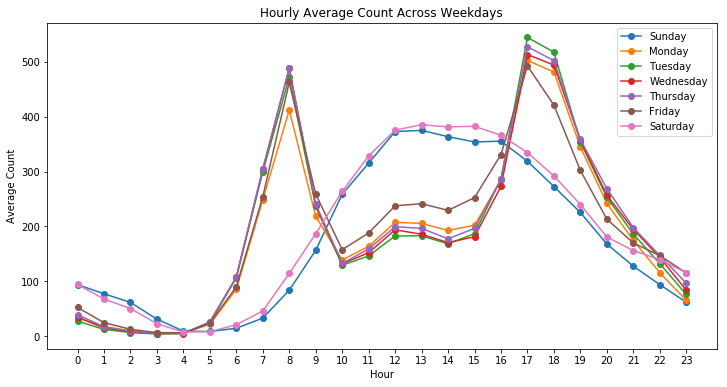

In [71]:
plt.figure(figsize=(12,6))
plt.plot(weekday.index,weekday.Sunday,'-o')
plt.plot(weekday.index,weekday.Monday,'-o')
plt.plot(weekday.index,weekday.Tuesday,'-o')
plt.plot(weekday.index,weekday.Wednesday,'-o')
plt.plot(weekday.index,weekday.Thursday,'-o')
plt.plot(weekday.index,weekday.Friday,'-o')
plt.plot(weekday.index,weekday.Saturday,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across Weekdays')
plt.legend()

In [ ]:
hourly_avg_user_year1 = []
hourly_avg_user_year2 = []
hourly_avg=[]

for i in range(24):
    hourly_avg_user_year1.append(np.sum(hour[hour.yr == 0 ][hour.hr==i].casual)/len(hour[hour.yr == 0][hour.hr==j]))
    hourly_avg_user_year2.append(np.sum(hour[hour.yr == 1 ][hour.hr==i].casual)/len(hour[hour.yr == 1][hour.hr==j]))
    hourly_avg.append(np.sum(hour[hour.hr==i].casual)/len(hour[hour.hr==j]))

for j in range(24):
    hourly_avg_user_year1.append(np.sum(hour[hour.yr == 0 ][hour.hr==j].registered)/len(hour[hour.yr == 0][hour.hr==j]))
    hourly_avg_user_year2.append(np.sum(hour[hour.yr == 1 ][hour.hr==j].registered)/len(hour[hour.yr == 1][hour.hr==j]))
    hourly_avg.append(np.sum(hour[hour.hr==i].casual)/len(hour[hour.hr==j]))

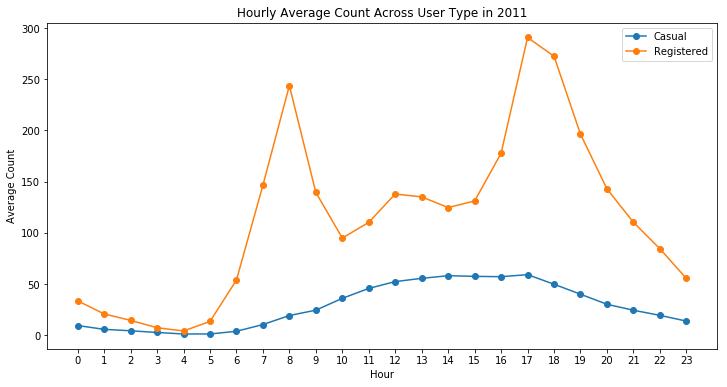

In [73]:
hourly_user_year1 = pd.DataFrame({'Casual':hourly_avg_user_year1[0:24],'Registered':hourly_avg_user_year1[24:48]})
hourly_user_year2 = pd.DataFrame({'Casual':hourly_avg_user_year2[0:24],'Registered':hourly_avg_user_year2[24:48]})
hourly_user = pd.DataFrame({'Casual':hourly_avg[0:24],'Registered':hourly_avg[24:48]})

plt.figure(figsize=(12,6))
plt.plot(hourly_user_year1.index,hourly_user_year1.Casual,'-o')
plt.plot(hourly_user_year1.index,hourly_user_year1.Registered,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across User Type in 2011')
plt.legend()

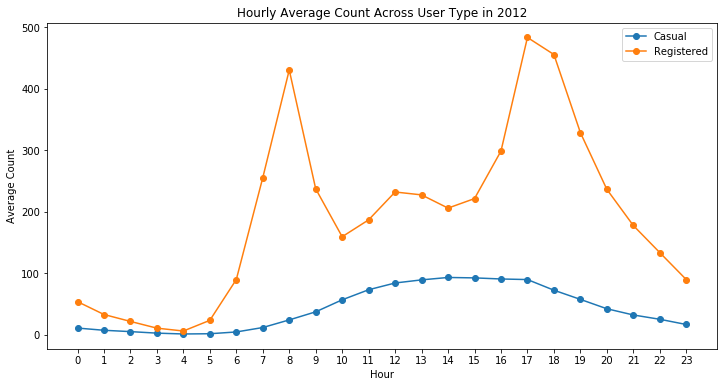

In [74]:
plt.figure(figsize=(12,6))
plt.plot(hourly_user_year2.index,hourly_user_year2.Casual,'-o')
plt.plot(hourly_user_year2.index,hourly_user_year2.Registered,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across User Type in 2012')
plt.legend()

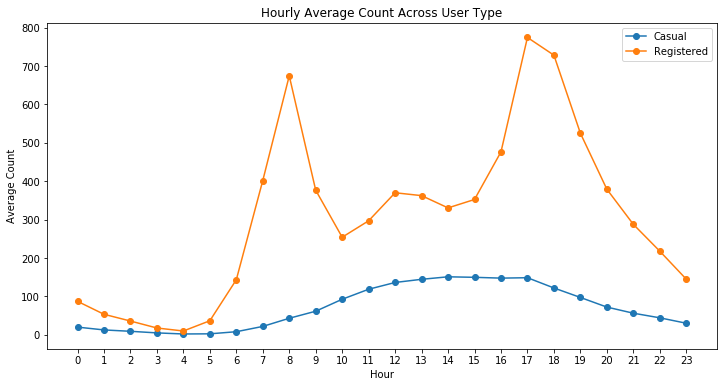

In [75]:
plt.figure(figsize=(12,6))
plt.plot(hourly_user.index,hourly_user_year1.Casual+hourly_user_year2.Casual,'-o')
plt.plot(hourly_user.index,hourly_user_year1.Registered+hourly_user_year2.Registered,'-o')
plt.xticks(np.arange(0, 24, step=1))
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.title('Hourly Average Count Across User Type')
plt.legend()

In [76]:
wind_speed_acc = np.unique(hour.windspeed)
wind_speed=np.unique(round(hour.windspeed,3))
length = len(wind_speed)

In [77]:
speed_count = []
for i in range(length):
    speed_count.append(len(hour.windspeed[hour.windspeed==wind_speed_acc[i]]))

In [78]:
wind_speed

array([0.   , 0.09 , 0.104, 0.134, 0.164, 0.194, 0.224, 0.254, 0.284,
       0.298, 0.328, 0.358, 0.388, 0.418, 0.448, 0.463, 0.492, 0.522,
       0.552, 0.582, 0.612, 0.642, 0.657, 0.687, 0.716, 0.746, 0.776,
       0.806, 0.836, 0.851])

In [79]:
speed_count=np.array(speed_count)

In [80]:
wind_speed_df = pd.DataFrame({'wind_speed':wind_speed,'speed_count':speed_count})

Text(0, 0.5, 'Count')

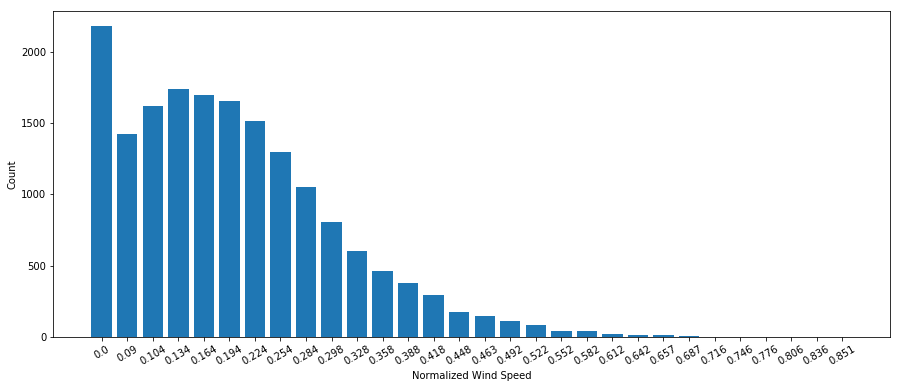

In [81]:
plt.figure(figsize=(15,6))
y_pos = np.arange(len(wind_speed_df.wind_speed))
plt.bar(y_pos,wind_speed_df.speed_count)
plt.xticks(y_pos,wind_speed,rotation=30 )
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Count')


In [82]:
from sklearn.ensemble import RandomForestClassifier
wCol= ["season","weathersit","hum","mnth","temp","yr","atemp"]
dataWind0 = hour[hour["windspeed"]==0]
dataWindNot0 = hour[hour["windspeed"]!=0]
dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
rfModel_wind = RandomForestClassifier()
rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])
wind0Values = rfModel_wind.predict(X= dataWind0[wCol])
dataWind0["windspeed"] = wind0Values
hour = dataWindNot0.append(dataWind0)
hour["windspeed"] = hour["windspeed"].astype("float")
hour.reset_index(inplace=True)
hour.drop('index',inplace=True,axis=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0, 0.5, 'Count')

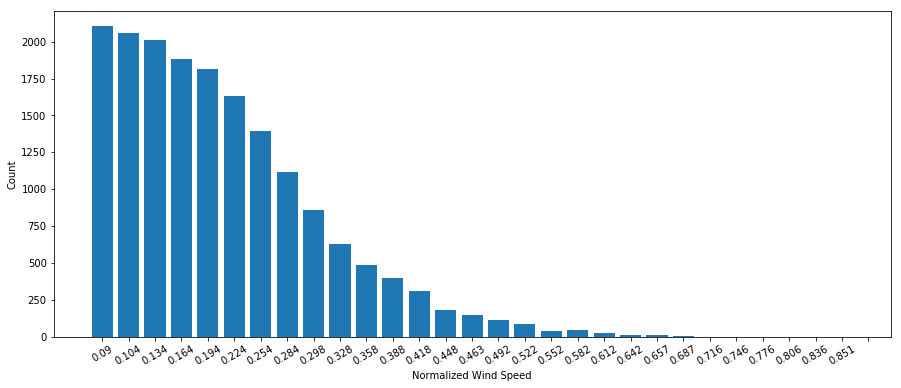

In [83]:
wind_speed_acc_fix = np.unique(hour.windspeed)
wind_speed_fix=np.unique(round(hour.windspeed,3))
length1 = len(wind_speed_fix)
speed_count_fix = []
for j in range(length1):
    speed_count_fix.append(len(hour.windspeed[hour.windspeed==wind_speed_acc_fix[j]]))
speed_count_fix=np.array(speed_count_fix)
wind_speed_df_fix = pd.DataFrame({'wind_speed_fix':wind_speed_fix,'speed_count_fix':speed_count_fix})
plt.figure(figsize=(15,6))
y_pos_fix = np.arange(len(wind_speed_df_fix.wind_speed_fix))
plt.bar(y_pos_fix,wind_speed_df_fix.speed_count_fix)
plt.xticks(y_pos,wind_speed_fix,rotation=30 )
plt.xlabel('Normalized Wind Speed')
plt.ylabel('Count')

In [84]:
hour_year_1_fix = hour[hour.yr == 0].reset_index(drop=True)
hour_year_2_fix = hour[hour.yr == 1].reset_index(drop=True)

Text(0.5, 1.0, 'Correlation Matrix of Year 2011')

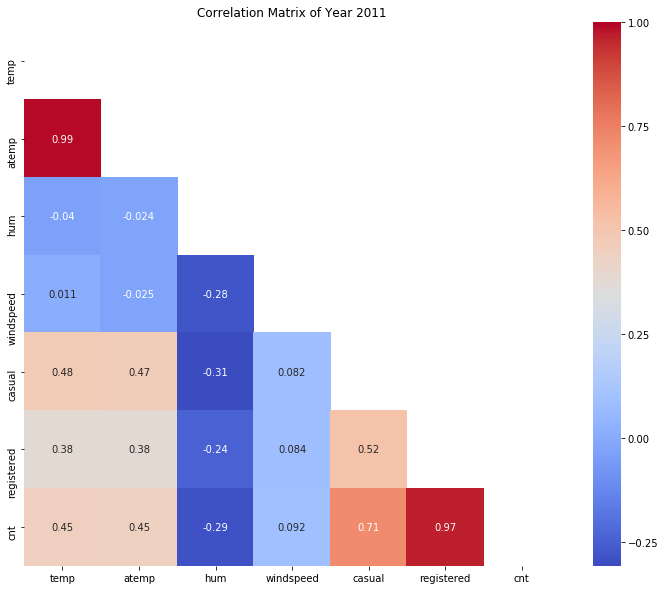

In [85]:
corr = hour_year_1_fix.drop(['instant','yr','mnth','hr','weekday','season','holiday','workingday','weathersit'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);
plt.title('Correlation Matrix of Year 2011')

In [87]:
hour_fix = pd.read_csv('hour_fix.csv')
hour_fix.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'dteday', 'season',
       'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

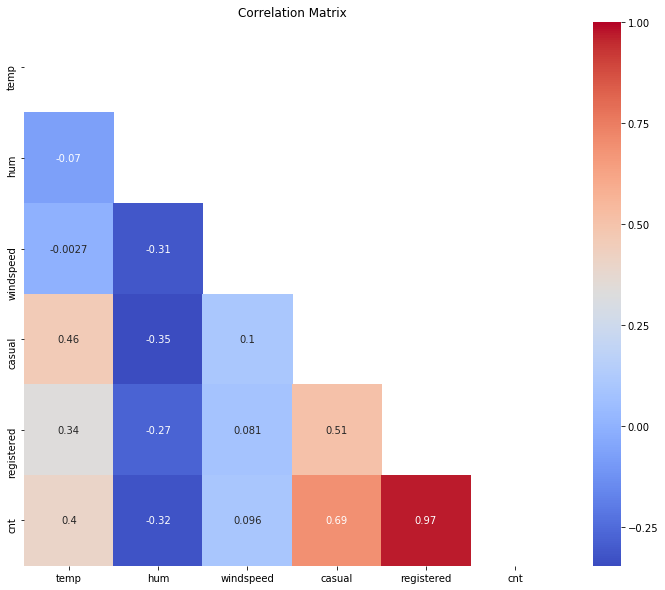

In [93]:
hour_fix = pd.read_csv('hour_fix.csv')
hour_fix=hour_fix.drop('Unnamed: 0',axis=1)
corr = hour_fix.drop(['Unnamed: 0.1', 'Unnamed: 0.1.1','yr','mnth','hr','weekday','season','holiday','workingday','weathersit'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);
plt.title('Correlation Matrix')

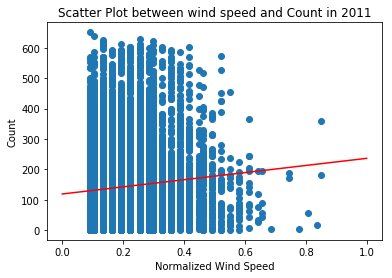

In [96]:
plt.scatter('windspeed','cnt',data=hour_year_1_fix)
a, b = np.polyfit(hour_year_1_fix.windspeed,hour_year_1_fix.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
_ = plt.title('Scatter Plot between wind speed and Count in 2011')
plt.show()

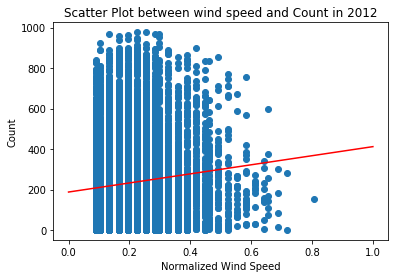

In [97]:
plt.scatter('windspeed','cnt',data=hour_year_2_fix)
a, b = np.polyfit(hour_year_2_fix.windspeed,hour_year_2_fix.cnt,1)
x = np.array([0,1])
y = a * x + b
_ = plt.plot(x, y,'r')
_ = plt.xlabel('Normalized Wind Speed')
_ = plt.ylabel('Count')
_ = plt.title('Scatter Plot between wind speed and Count in 2012')
plt.show()

In [98]:
hour_fix.to_csv('hour_fix.csv')

In [99]:
hour_fix=pd.read_csv('hour_fix.csv')

(array([4.183e+03, 3.909e+03, 1.815e+03, 1.637e+03, 1.378e+03, 1.961e+03,
        6.160e+02, 8.830e+02, 3.110e+02, 3.350e+02, 1.150e+02, 8.600e+01,
        8.400e+01, 2.500e+01, 2.600e+01, 5.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00]),
 array([0.0896  , 0.127655, 0.16571 , 0.203765, 0.24182 , 0.279875,
        0.31793 , 0.355985, 0.39404 , 0.432095, 0.47015 , 0.508205,
        0.54626 , 0.584315, 0.62237 , 0.660425, 0.69848 , 0.736535,
        0.77459 , 0.812645, 0.8507  ]),
 <a list of 20 Patch objects>)

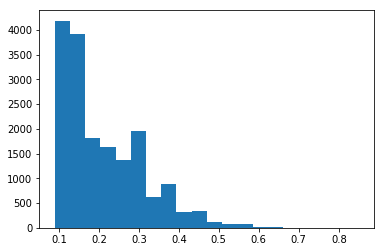

In [100]:
plt.hist(hour_fix.windspeed,bins=20)

In [101]:
np.min(hour_fix.windspeed)

0.0896

In [102]:
hour_wea1 = hour[hour.weathersit==1]
print('when wather is Clear, Few clouds, Partly cloudy, Partly cloudy,')
print('user count mean is ',np.mean(hour_wea1.cnt), ' and standard deaviation is ',np.std(hour_wea1.cnt))

when wather is Clear, Few clouds, Partly cloudy, Partly cloudy,
user count mean is  204.8692718829405  and standard deaviation is  189.4794718410403


In [461]:
hour_wea2 = hour[hour.weathersit==2]
print('when wather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,')
print('user count mean is ',np.mean(hour_wea2.cnt), ' and standard deaviation is ',np.std(hour_wea2.cnt))


when wather is Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist,
user count mean is  175.16549295774647  and standard deaviation is  165.4133849752866


In [462]:
hour_wea3 = hour[hour.weathersit==3]
print('when wather is Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,')
print('user count mean is ',np.mean(hour_wea3.cnt), ' and standard deaviation is ',np.std(hour_wea3.cnt))



when wather is Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds,
user count mean is  111.57928118393235  and standard deaviation is  133.73389750695554


In [463]:
hour_wea4 = hour[hour.weathersit==4]
print('when wather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog,') 
print('user count mean is ',np.mean(hour_wea4.cnt), ' and standard deaviation is ',np.std(hour_wea4.cnt))


when wather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog,
user count mean is  74.33333333333333  and standard deaviation is  63.625641232306826


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


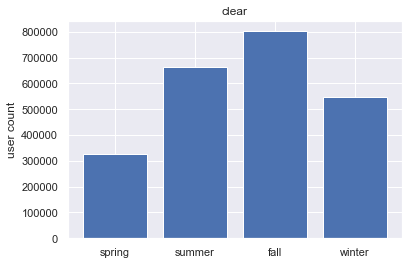

In [547]:
weather1 = np.empty(4)
for i in range(4):
    weather1[i] = hour[hour.season==(i+1)][hour.weathersit==1].cnt.sum()

x_pos = np.arange(4)
plt.bar(x_pos, weather1, color='b');
x = ['spring', 'summer', 'fall', 'winter']
plt.xticks(x_pos, x);
plt.ylabel('user count');
plt.title('clear');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


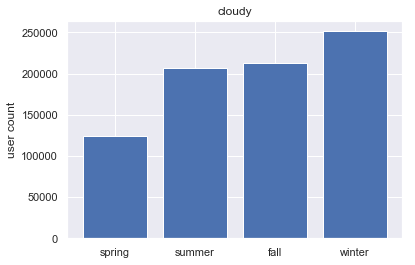

In [549]:
weather2 = np.empty(4)
for i in range(4):
    weather2[i] = hour[hour.season==(i+1)][hour.weathersit==2].cnt.sum()

x_pos = np.arange(4)
plt.bar(x_pos, weather2, color='b');
x = ['spring', 'summer', 'fall', 'winter']
plt.xticks(x_pos, x);
plt.ylabel('user count');
plt.title('cloudy');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


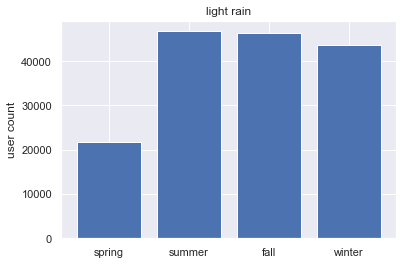

In [550]:
weather3 = np.empty(4)
for i in range(4):
    weather3[i] = hour[hour.season==(i+1)][hour.weathersit==3].cnt.sum()

x_pos = np.arange(4)
plt.bar(x_pos, weather3, color='b');
x = ['spring', 'summer', 'fall', 'winter']
plt.xticks(x_pos, x);
plt.ylabel('user count');
plt.title('light rain');

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


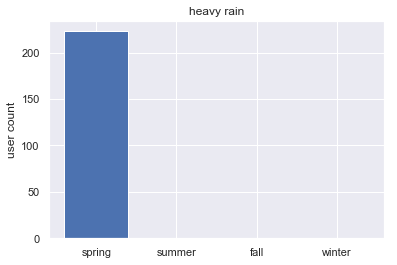

In [551]:
weather4 = np.empty(4)
for i in range(4):
    weather4[i] = hour[hour.season==(i+1)][hour.weathersit==4].cnt.sum()

x_pos = np.arange(4)
plt.bar(x_pos, weather4, color='b');
x = ['spring', 'summer', 'fall', 'winter']
plt.xticks(x_pos, x);
plt.ylabel('user count');
plt.title('heavy rain');

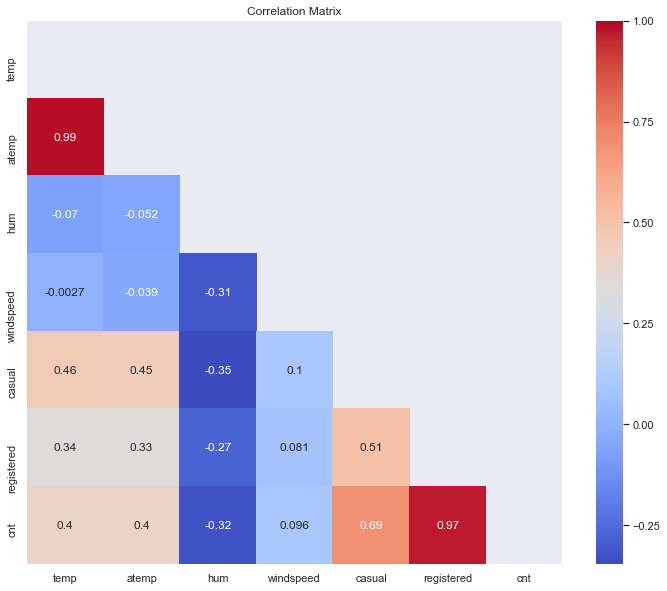

In [539]:
corr = hour.drop(['Unnamed: 0','instant','yr','mnth','hr','weekday','season','holiday','workingday','weathersit'],axis = 1).corr()
corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            mask = mask);
plt.title('Correlation Matrix');

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


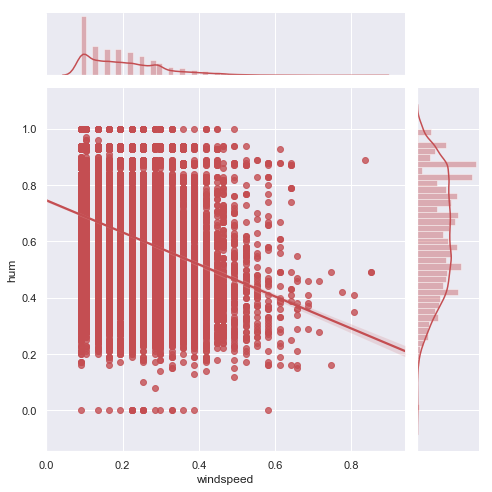

In [543]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('windspeed', 'hum', data=hour, kind='reg', color='r', size=7)
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


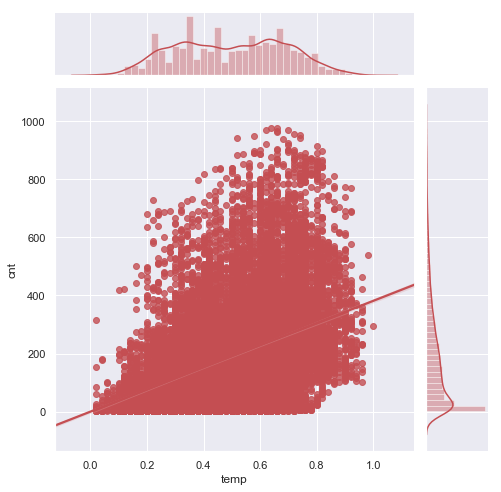

In [533]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('temp', 'cnt', data=hour, kind='reg', color='r', size=7)
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


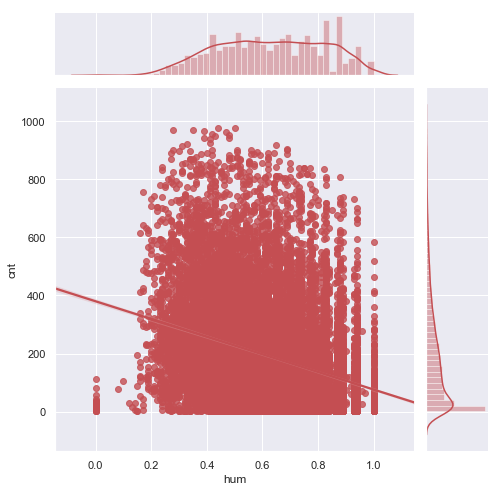

In [685]:
sns.set(style="darkgrid", color_codes=True)
sns.jointplot('hum', 'cnt', data=hour, kind='reg', color='r', size=7)
plt.show()

In [686]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0, 0.5, 'ECDF')

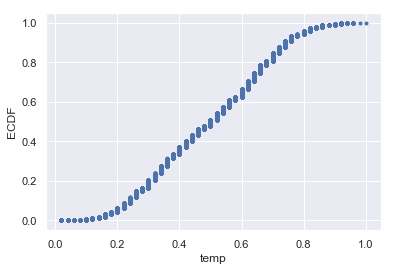

In [687]:
x1,y1 = ecdf(hour.temp)
plt.plot(x1,y1,marker='.',linestyle='none')
plt.xlabel('temp')
plt.ylabel('ECDF')

Text(0, 0.5, 'ECDF')

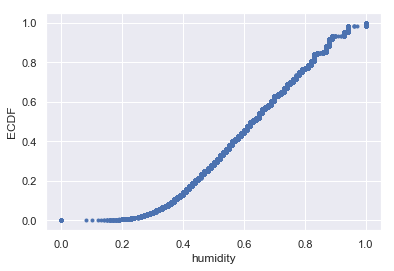

In [688]:
x1,y1 = ecdf(hour.hum)
plt.plot(x1,y1,marker='.',linestyle='none')
plt.xlabel('humidity')
plt.ylabel('ECDF')

Text(0, 0.5, 'ECDF')

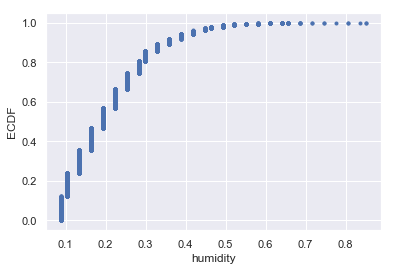

In [689]:
x1,y1 = ecdf(hour.windspeed)
plt.plot(x1,y1,marker='.',linestyle='none')
plt.xlabel('humidity')
plt.ylabel('ECDF')

(array([8.092e+03, 3.452e+03, 3.339e+03, 1.499e+03, 6.460e+02, 2.010e+02,
        1.090e+02, 3.100e+01, 4.000e+00, 6.000e+00]),
 array([0.0896 , 0.16571, 0.24182, 0.31793, 0.39404, 0.47015, 0.54626,
        0.62237, 0.69848, 0.77459, 0.8507 ]),
 <a list of 10 Patch objects>)

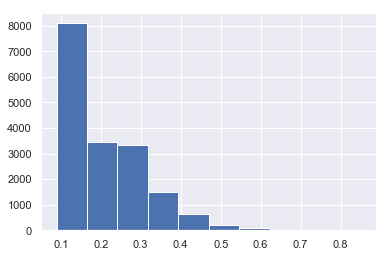

In [691]:
plt.hist(hour.windspeed)

In [3]:
workday = (hour.cnt[hour.holiday == 0])
print('workday user count mean is ',np.mean(workday), ' and workday user count standard deaviation is ',np.std(workday))

workday user count mean is  190.4285798921737  and workday user count standard deaviation is  181.97604409381324


In [4]:
holiday = (hour.cnt[hour.holiday == 1])
print('holiday user count mean is ',np.mean(holiday), ' and holiday user count standard deaviation is ',np.std(holiday))

holiday user count mean is  156.87  and holiday user count standard deaviation is  156.60064208042053


In [5]:
sp = np.sqrt(((len(workday)-1)*np.std(workday)**2+(len(holiday)-1)*np.std(holiday)**2)/(len(workday)+len(holiday)-2))


In [31]:
from scipy.stats import t
from scipy import stats
t, p_val = stats.ttest_ind(workday, holiday, equal_var = False)
t, p_val

(4.694180230217056, 3.3983875803491955e-06)

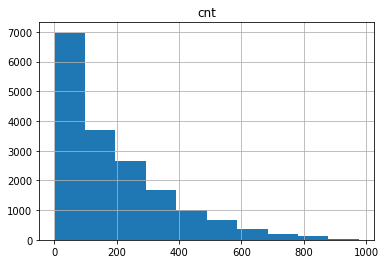

In [12]:
hour.hist('cnt')
plt.show()

In [18]:
mean=np.mean(hour.cnt)
std_dev = np.std(hour.cnt)
one_side_interval=mean+norm.ppf(0.01)*std_dev/np.sqrt(len(hour))
one_side_interval

186.26229629162648

(array([2213.,  988.,  535.,  249.,   95.,   70.,   57.,   16.,   11.,
           8.]),
 array([  1.,  81., 161., 241., 321., 401., 481., 561., 641., 721., 801.]),
 <a list of 10 Patch objects>)

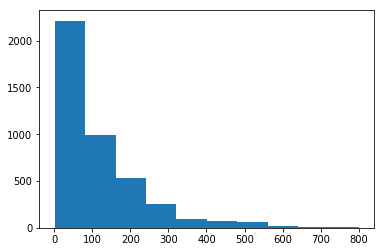

In [19]:
plt.hist(hour[hour.season==1].cnt)

In [22]:
mean=np.mean(hour[hour.season==1].cnt)
std_dev = np.std(hour[hour.season==1].cnt)
one_side_interval_spring=mean+norm.ppf(0.01)*std_dev/np.sqrt(len(hour[hour.season==1].cnt))
one_side_interval_spring

106.85660586851719

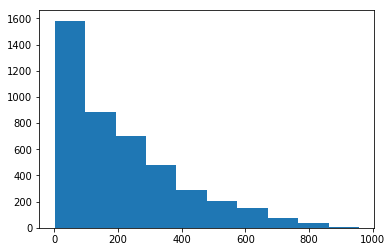

In [27]:
plt.hist(hour[hour.season==2].cnt);

In [23]:
mean=np.mean(hour[hour.season==2].cnt)
std_dev = np.std(hour[hour.season==2].cnt)
one_side_interval_summer=mean+norm.ppf(0.01)*std_dev/np.sqrt(len(hour[hour.season==2].cnt))
one_side_interval_summer

201.7455003475467

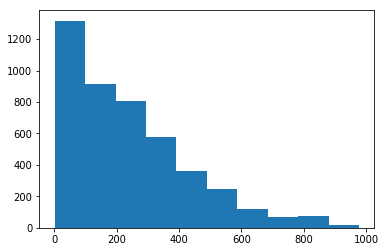

In [28]:
plt.hist(hour[hour.season==3].cnt);

In [24]:
mean=np.mean(hour[hour.season==3].cnt)
std_dev = np.std(hour[hour.season==3].cnt)
one_side_interval_fall=mean+norm.ppf(0.01)*std_dev/np.sqrt(len(hour[hour.season==3].cnt))
one_side_interval_fall

229.15747958767787

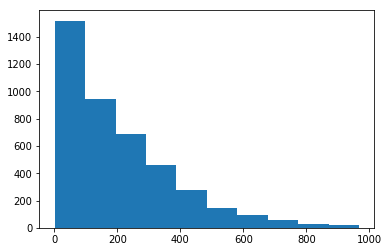

In [30]:
plt.hist(hour[hour.season==4].cnt);

In [25]:
mean=np.mean(hour[hour.season==4].cnt)
std_dev = np.std(hour[hour.season==4].cnt)
one_side_interval_winter=mean+norm.ppf(0.01)*std_dev/np.sqrt(len(hour[hour.season==4].cnt))
one_side_interval_winter

192.3266296836024

In [5]:
hour.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'dteday', 'season',
       'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
hour.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'], axis=1).to_csv('hour_data.csv')

In [8]:
hour_data = pd.read_csv('hour_data.csv')

In [11]:
hour_data=hour_data.drop('Unnamed: 0',axis=1)

In [13]:
hour_data.to_csv('hour_data.csv')

In [2]:
hour_data = pd.read_csv('hour_data.csv')

In [4]:
hour_data=hour_data.drop(['Unnamed: 0'],axis=1)

In [18]:
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.75,0.0896,0,1,1
1,2011-01-01,1,0,1,10,0,6,0,1,0.38,0.76,0.2537,12,24,36
2,2011-01-01,1,0,1,11,0,6,0,1,0.36,0.81,0.2836,26,30,56
3,2011-01-01,1,0,1,12,0,6,0,1,0.42,0.77,0.2836,29,55,84
4,2011-01-01,1,0,1,13,0,6,0,2,0.46,0.72,0.2985,47,47,94


In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

## **Linear Regression Model** ##

In [138]:
dataTrain = hour_data[pd.notnull(data['cnt'])].sort_values(by=["dteday"])
yLabels = dataTrain["cnt"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split( dataTrain, yLabels, test_size=0.3, random_state=42)
dateTimeColValidate = X_validate["dteday"]

In [140]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [141]:
dropFeatures = ['casual','cnt','dteday','registered']
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
X_train = X_train.drop(dropFeatures,axis=1)
X_validate = X_validate.drop(dropFeatures,axis=1)

In [142]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
lModel.fit(X = X_train,y = np.log1p(y_train))

# Make predictions
preds = lModel.predict(X= X_validate)
print ("RMSLE Value For Linear Regression In Validation: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))


RMSLE Value For Linear Regression In Validation:  0.9910787035737662


**Visualizing Distribution Of Train And Test**

[Text(0.5, 1.0, 'Test Set Distribution')]

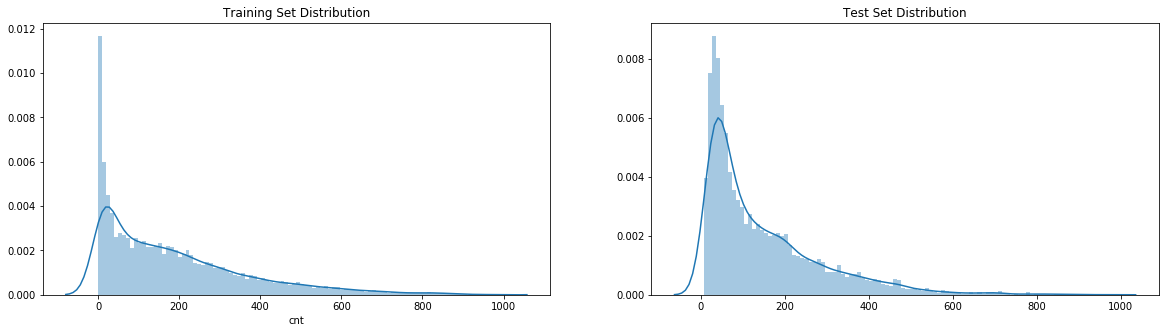

In [143]:
import seaborn as sn
predsTest = lModel.predict(X=X_validate)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,5)
sn.distplot(yLabels,ax=ax1,bins=100)
sn.distplot(np.exp(predsTest),ax=ax2,bins=100)
ax1.set(title="Training Set Distribution")
ax2.set(title="Test Set Distribution")

## **Regularization Model -  Ridge** ##

{'alpha': 4, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9911004396644307


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

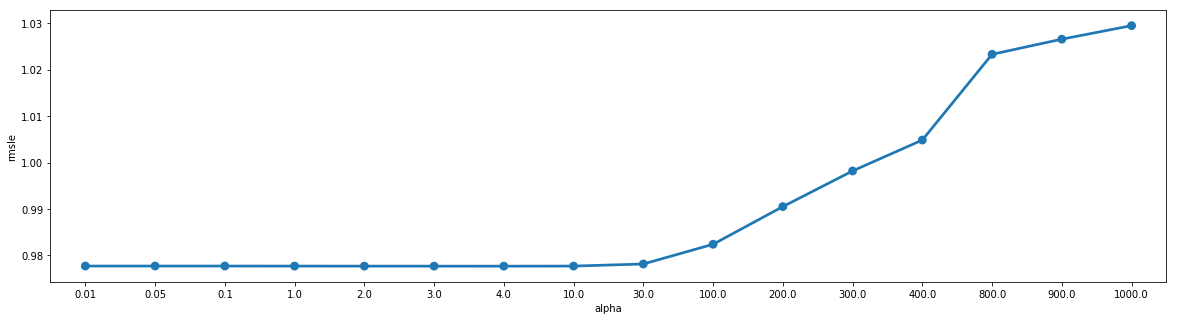

In [144]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01,0.05,0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
grid_ridge_m.fit(X = X_train,y = np.log1p(y_train))
preds = grid_ridge_m.predict(X= X_validate)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(20,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

## **Regularization Model - Lasso** ##


{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9909216166783059


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

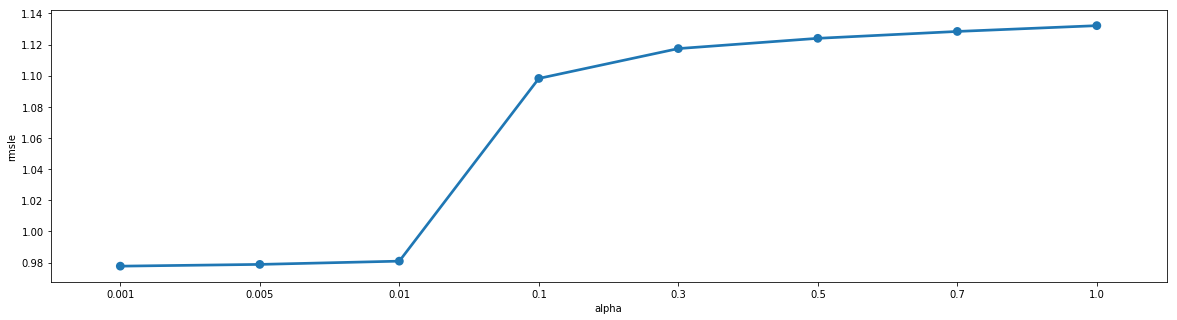

In [145]:
from sklearn.linear_model import Lasso
lasso_m_ = Lasso()

alpha  = [0.001,0.005,0.01,0.3,0.1,0.3,0.5,0.7,1]
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit(X = X_train,y = np.log1p(y_train))
preds = grid_lasso_m.predict(X= X_validate)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(20,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

## **Ensemble Models - Random Forest** ##

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfModel = RandomForestRegressor(n_estimators=100) ### Test 0.44
rfModel.fit(X = X_train,y = np.log1p(y_train))
preds = rfModel.predict(X= X_validate)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))

RMSLE Value For Random Forest:  0.2997844744253983


**Feature Importance By Random Forest**

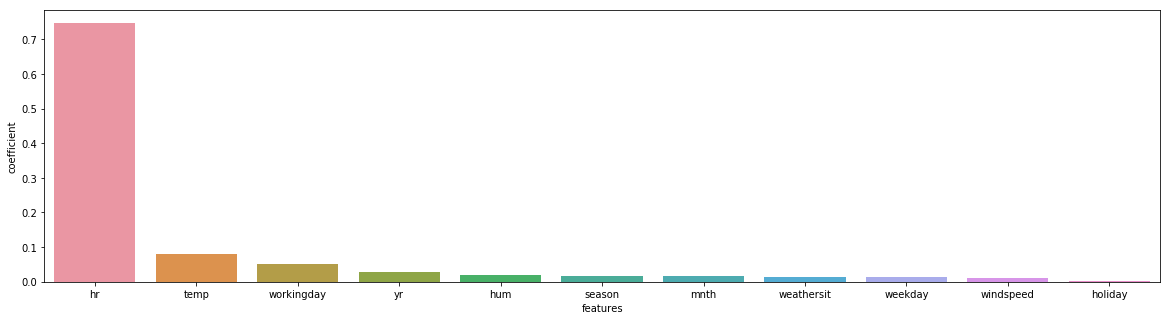

In [147]:
features = pd.DataFrame()
features['features'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=features,x="features",y="coefficient",ax=ax)

## **Ensemble Model - Gradient Boost** ##


In [148]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01) ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(X = X_train,y = np.log1p(y_train))
preds = gbm.predict(X= X_validate)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(np.log1p(y_validate)),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.2725221042576878


[Text(0.5, 1.0, 'Test Set Distribution')]

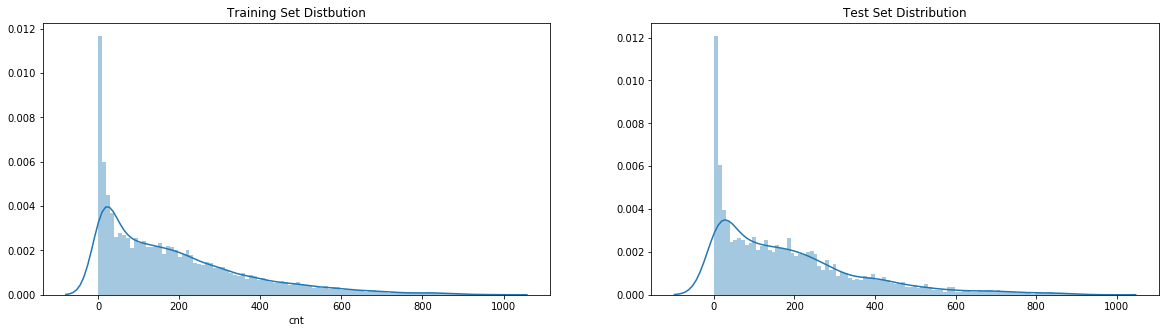

In [151]:
predsTest = gbm.predict(X=X_validate)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(20,5)
sn.distplot(yLabels,ax=ax1,bins=100)
sn.distplot(np.exp(predsTest),ax=ax2,bins=100)
ax1.set(title="Training Set Distbution")
ax2.set(title="Test Set Distribution")